In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [3]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

c:\Users\aponc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


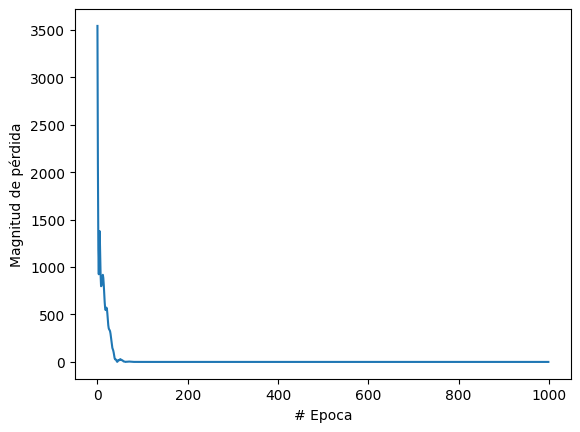

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [8]:
import numpy as np
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0])) 
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
El resultado es [[211.74744]] fahrenheit!


In [9]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.24326587, -0.86963296, -0.03654842]], dtype=float32), array([ 2.8029706, -4.2362733,  3.790451 ], dtype=float32)]
[array([[ 0.6315835 ,  0.2218326 , -0.36256158],
       [-0.5694456 , -0.0104853 ,  1.4009868 ],
       [ 0.16890568, -0.42774966, -0.8722069 ]], dtype=float32), array([ 3.944958 ,  1.1136175, -4.1572437], dtype=float32)]
[array([[ 1.0043076],
       [ 0.1426914],
       [-1.3341739]], dtype=float32), array([3.8928537], dtype=float32)]
